In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.style.use('ggplot')

In [3]:
# import data
df = pd.read_csv(r'C:\Users\Patrick\Documents\concordia-bootcamps\Final Project\data\game_reviews_combined.csv')

C:\Users\Patrick\AppData\Local\Temp\ipykernel_15352\3772581767.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Patrick\Documents\concordia-bootcamps\Final Project\data\game_reviews_combined.csv')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33283 entries, 0 to 33282
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   33283 non-null  int64  
 1   game_title                   33283 non-null  object 
 2   recommendationid             33283 non-null  float64
 3   author                       33283 non-null  object 
 4   language                     33283 non-null  object 
 5   review                       33240 non-null  object 
 6   timestamp_created            33283 non-null  float64
 7   timestamp_updated            33283 non-null  float64
 8   voted_up                     33283 non-null  bool   
 9   votes_up                     33283 non-null  float64
 10  votes_funny                  33283 non-null  float64
 11  weighted_vote_score          33283 non-null  float64
 12  comment_count                33283 non-null  float64
 13  steam_purchase  

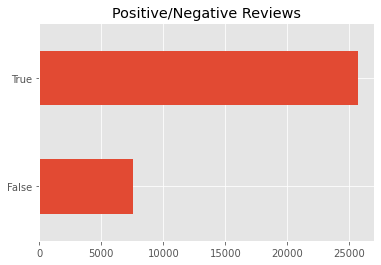

In [5]:
# get summary statistics (# positive/negative reviews, # reviews/game, # reviews/genre)
# I'd like to have this order reversed, but idk how to do it yet
df['voted_up'].value_counts().sort_values().plot(kind='barh', title='Positive/Negative Reviews');

In [17]:
df.groupby('game_title')['voted_up'].value_counts()

game_title                  voted_up
ANNO_Mutationem             True        182
                            False        54
ARK_Survival_Evolved        True        269
                            False        89
ASTRONEER                   True        219
                                       ... 
iRacing                     True         67
                            False        38
tERRORbane                  True         20
theHunter_Call_of_the_Wild  True        212
                            False        79
Name: voted_up, Length: 242, dtype: int64

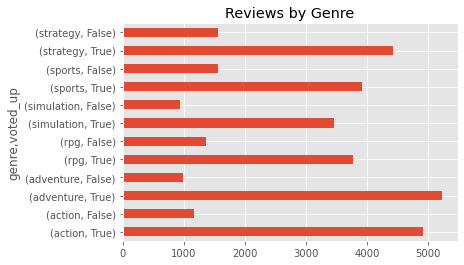

In [8]:
df.groupby('genre')['voted_up'].value_counts().plot(kind='barh')
plt.title('Reviews by Genre')
plt.show()

<AxesSubplot:title={'center':'Reviews by Genre'}, ylabel='genre'>

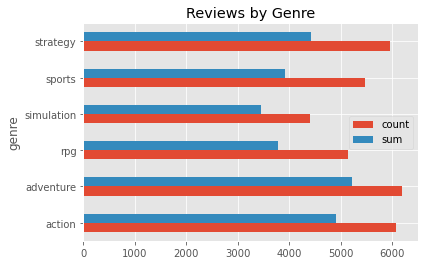

In [19]:
df_1 = df.groupby('genre').agg(['count', 'sum'])
df_1['voted_up'].plot(kind='barh', title='Reviews by Genre')

In [20]:
genres = df['genre'].unique().tolist()

# fig, axes = plt.subplots(nrows=3, ncols=2)
# for genre in genres:
#     gca = plt.gca()
# df[df['genre'] == genre].groupby('game_title')['voted_up'].value_counts().plot(kind='bar', subplots=True)
# plt.show()

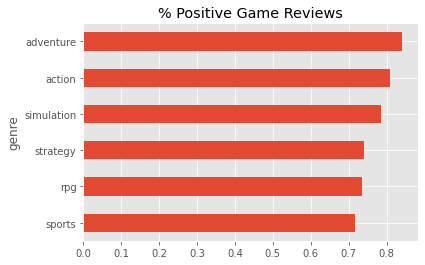

In [21]:
# When I clean this up, put labels with # of reviews
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
df.groupby('genre')['voted_up'].sum().div(df.groupby('genre')['voted_up'].count()).sort_values().plot(kind='barh')
plt.title('% Positive Game Reviews')
plt.show()

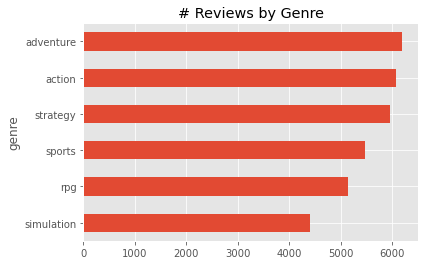

In [22]:
df.groupby('genre')['voted_up'].count().sort_values().plot(kind='barh', title='# Reviews by Genre');

In [ ]:
# Clean review data
# df[(df['genre'] == 'action') & (df['voted_up'] == True)].groupby('game_title')

## Cleaning Review Data for NLP

In [ ]:
#Clean Data
# Remove punctuation
# Remove stopwords
# Tokenize
# lemmatize/stem - rn I use Porter, but may be worth trying different stemmers/lemmatizers for different results

In [9]:
review_text = df['review']
review_text.head()

0    Immersive story, lovely characters and voice a...
1    This game is a slow burn, it builds over time....
2    The character interactions in the cutscenes in...
3                       Daryl Dixon Simulator.....YES!
4    This game is incredibly underrated. I find mys...
Name: review, dtype: object

In [10]:
# Lower
review_text = review_text.str.lower()

In [11]:
review_text

0        immersive story, lovely characters and voice a...
1        this game is a slow burn, it builds over time....
2        the character interactions in the cutscenes in...
3                           daryl dixon simulator.....yes!
4        this game is incredibly underrated. i find mys...
                               ...                        
33278    great potential. played 14 hours on the early ...
33279    the game is much closer to wargame 4 than stee...
33280                                        a10 goes brrr
33281    not worth the price for its stage. no campain ...
33282    i am decently surprised, this is a very solid ...
Name: review, Length: 33283, dtype: object

In [12]:
import nltk

In [13]:
# Trying to keep dataframe whole. I may just use review text and the voted_up for prediction?
df.dropna(subset='review', inplace=True)

In [14]:
review_text.isna().sum() #43 NAN
review_text.dropna(inplace=True)

In [29]:
review_sent_tokens = review_text.apply(nltk.tokenize.sent_tokenize)

In [30]:
review_sent_tokens[2]

['the character interactions in the cutscenes in this game felt more real to me than most tv show or movie characters.',
 'it was actually enjoyable to watch a cutscene most of the time.',
 'and the gameplay is pretty addictive once you get over your fear of running out of petrol.',
 "i was scared of freakers for a good long time before i got decent gear and realised how they worked (or didn't - they're pretty blind and deaf) and by the games end i was disappointed if a horde wasn't very big.",
 'a lot of games i play i feel towards the end that they should have finished 10 hours ago but this one i wanted to keep going.',
 "it has bugs and weird things but it's so much fun i can forgive my character yelling at the top of his voice about the latest copeland radio sound bite whilst i try to sneak up on some freakers and they don't hear me.",
 "it's a solidly fun game made by a team that understand how to entertain a player whilst telling a heartfelt story."]

In [31]:
review_word_tokens = review_text.apply(nltk.tokenize.word_tokenize)

In [32]:
review_word_tokens

0        [immersive, story, ,, lovely, characters, and,...
1        [this, game, is, a, slow, burn, ,, it, builds,...
2        [the, character, interactions, in, the, cutsce...
3                 [daryl, dixon, simulator, ....., yes, !]
4        [this, game, is, incredibly, underrated, ., i,...
                               ...                        
33278    [great, potential, ., played, 14, hours, on, t...
33279    [the, game, is, much, closer, to, wargame, 4, ...
33280                                    [a10, goes, brrr]
33281    [not, worth, the, price, for, its, stage, ., n...
33282    [i, am, decently, surprised, ,, this, is, a, v...
Name: review, Length: 33240, dtype: object

In [15]:
# Punctuation
import re
replaceDict = dict({
'{':" ", '}':" ", ',':"", '.':" ", '!':" ", '\\':" ", '/':" ", '$':" ", '%':" ",
'^':" ", '?':" ", '\'':" ", '"':" ", '(':" ", ')':" ", '*':" ", '+':" ", '-':" ",
'=':" ", ':':" ", ';':" ", ']':" ", '[':" ", '`':" ", '~':" ", '☑': ' ', '☐':' ',
})

rep = dict((re.escape(k),v) for k, v in replaceDict.items())
pattern = re.compile('|'.join(rep.keys()))
def replacer(text):
    return rep[re.escape(text.group(0))]

In [16]:
words = review_text.str.replace(pattern, replacer).str.lower().str.split()

In [17]:
# Remove Stopwords
stopwords = nltk.corpus.stopwords.words("english")
# stopwords = stopwords.extend(['☑', '☐'])
def remove_stopwords(lst):
    return ' '.join(word for word in lst if word not in stopwords)

In [18]:
review_clean = words.apply(remove_stopwords)

In [19]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# stemmed_words = [ps.stem(w) for lst in words for w in lst]
def get_stems(lst):
    return ' '.join(ps.stem(w) for w in lst.split())

review_stemmed = review_clean.apply(get_stems)

In [20]:
review_stemmed

0        immers stori love charact voic act optim run s...
1        game slow burn build time visual stun well pro...
2        charact interact cutscen game felt real tv sho...
3                                     daryl dixon simul ye
4        game incred underr find struggl enjoy open wor...
                               ...                        
33278    great potenti play 14 hour earli access far de...
33279    game much closer wargam 4 steel divis 85 warga...
33280                                         a10 goe brrr
33281    worth price stage campain one mode singl playe...
33282    decent surpris solid game satisfi great number...
Name: review, Length: 33240, dtype: object

In [21]:
df['review_stemmed'] = review_stemmed

### Word Frequency Distributions

In [165]:
# Frequency Distribution of words
word_dist = nltk.FreqDist(review_stemmed)
word_dist

FreqDist({'good': 237, 'good game': 207, '': 175, 'ye': 148, 'fun': 110, 'great game': 70, 'nice': 47, 'fun game': 47, 'ok': 44, 'nice game': 40, ...})

In [22]:
def FrequencyDistribution(series):
    fd_words = series.apply(nltk.word_tokenize)
    fd = fd_words.apply(nltk.FreqDist)
    return fd

In [23]:
fd = FrequencyDistribution(review_stemmed)
fd

0        {'immers': 1, 'stori': 3, 'love': 2, 'charact'...
1        {'game': 5, 'slow': 1, 'burn': 1, 'build': 1, ...
2        {'charact': 3, 'interact': 1, 'cutscen': 2, 'g...
3            {'daryl': 1, 'dixon': 1, 'simul': 1, 'ye': 1}
4        {'game': 5, 'incred': 1, 'underr': 1, 'find': ...
                               ...                        
33278    {'great': 1, 'potenti': 1, 'play': 1, '14': 1,...
33279    {'game': 9, 'much': 3, 'closer': 1, 'wargam': ...
33280                      {'a10': 1, 'goe': 1, 'brrr': 1}
33281    {'worth': 1, 'price': 1, 'stage': 1, 'campain'...
33282    {'decent': 1, 'surpris': 1, 'solid': 1, 'game'...
Name: review, Length: 33240, dtype: object

In [24]:
fd2 = nltk.FreqDist(sum(review_stemmed.map(nltk.word_tokenize), []))

In [25]:
fd2.tabulate(20)

  game   play   like    get   time   good    one realli    fun   make   feel   even  stori     go   much  great  thing  would   hour   also 
 63671  17379  16126  12730  11375  10749   9147   8697   8582   8193   7170   6937   6240   6167   6021   5919   5907   5866   5527   5300 


In [72]:
# fd2.most_common()

In [73]:
# text = nltk.Text(review_text)
# text.concordance('good')

## Classification

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.metrics import classification_report

### Positive/Negative Review Classifier

In [100]:
# vectorizer = CountVectorizer()
# tf = TfidfTransformer(ngram_range=(1, 2))

# unigrams and bigrams, ignore words that appear in more than 75% of docs
tf = TfidfVectorizer(ngram_range=(1, 2), max_df=0.75)

X = review_stemmed
y = df['voted_up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# X_train = vectorizer.fit_transform(X_train) #fit_transform CountVectorizer on training data
X_train = tf.fit_transform(X_train)         #fit_transform TfidfTransformer on training data

# X_test = vectorizer.transform(X_test)       #transform CountVectorizer on testing data
X_test = tf.transform(X_test)               #transform TfidfTransformer on testing data

In [29]:
# pd.DataFrame(X_train.toarray(), columns=tf.get_feature_names())
feature_names = tf.get_feature_names_out()
len(feature_names)
# X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
# print('Top 5 rows of the DataFrame: ', X.head())

398509

In [39]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
def benchmark(clf, X_train=X_train, X_test=X_test):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    print()
    clf_descr = str(clf).split("(")[0]
    return clf_descr, score, train_time, test_time


In [101]:
# Ensemble Voting classifier
# Uses all 7 classifiers to predict a class. Majority vote wins.
rc = RidgeClassifier(tol=1e-2, solver="sparse_cg")
pc = Perceptron(max_iter=1000)
pac = PassiveAggressiveClassifier()
cnb = ComplementNB(alpha=0.01)
mnb = MultinomialNB(alpha=0.01)
bnb = BernoulliNB(alpha=0.01)
lsvc = LinearSVC(penalty='l2', dual=False, tol=1e-3)

eclf_sentiment = VotingClassifier(
     estimators=[('Ridge Classifier', rc), ('Perceptron', pc), ('Passive Aggressive Classifier', pac),
                 ('Complement Naive Bayes', cnb), ('Multinomial Naive Bayes', mnb), ('Bernoulli Naive Bayes', bnb),
                 ('LinearSVC', lsvc)
                ],
     voting='hard')

benchmark(eclf_sentiment)

________________________________________________________________________________
Training: 
VotingClassifier(estimators=[('Ridge Classifier',
                              RidgeClassifier(solver='sparse_cg', tol=0.01)),
                             ('Perceptron', Perceptron()),
                             ('Passive Aggressive Classifier',
                              PassiveAggressiveClassifier()),
                             ('Complement Naive Bayes',
                              ComplementNB(alpha=0.01)),
                             ('Multinomial Naive Bayes',
                              MultinomialNB(alpha=0.01)),
                             ('Bernoulli Naive Bayes', BernoulliNB(alpha=0.01)),
                             ('LinearSVC', LinearSVC(dual=False, tol=0.001))])
train time: 3.518s
test time:  0.185s
accuracy:   0.964



('VotingClassifier', 0.964049338146811, 3.5180866718292236, 0.1850416660308838)

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      1525
        True       0.97      0.98      0.98      5123

    accuracy                           0.96      6648
   macro avg       0.96      0.94      0.95      6648
weighted avg       0.96      0.96      0.96      6648



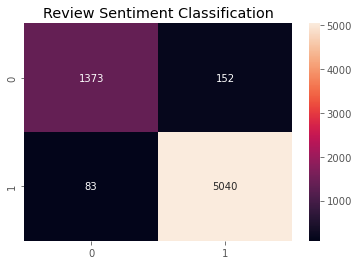

In [40]:
y_pred = eclf_sentiment.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Review Sentiment Classification');

In [42]:
a = pd.Series('Trash')
a = tf.transform(a)
eclf_sentiment.predict(a)

array([False])

In [67]:
# RandomSearch

# eclf_sentiment = VotingClassifier(
#      estimators=[('Ridge Classifier', rc), ('Perceptron', pc), ('Passive Aggressive Classifier', pac),
#                  ('Complement Naive Bayes', cnb), ('Multinomial Naive Bayes', mnb), ('Bernoulli Naive Bayes', bnb),
#                  ('LinearSVC', lsvc)
#                 ],
#      voting='hard')

params = {'Ridge Classifier__alpha':uniform(loc=1.0, scale=1000), 'Ridge Classifier__normalize':[True, False],
         'Perceptron__penalty':['l2','l1','elasticnet'],
         'Passive Aggressive Classifier__C':uniform(loc=1.0, scale=1000),
         'Complement Naive Bayes__alpha':uniform(loc=1.0, scale=1000), 'Complement Naive Bayes__norm':[True, False],
#           'Logistic Regression__penalty':['l2','l1','elasticnet', None], 'Logistic Regression__C':uniform(loc=1.0, scale=10000),
         }
eclf_sentiment_RS = RandomizedSearchCV(eclf_sentiment, params, random_state=101, n_iter=100)
search_sentiment = eclf_sentiment_RS.fit(X_train, y_train)
print(search_sentiment.best_estimator_)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

VotingClassifier(estimators=[('Ridge Classifier',
                              RidgeClassifier(alpha=2.1886611994497143,
                                              normalize=True,
                                              solver='sparse_cg', tol=0.01)),
                             ('Perceptron', Perceptron(penalty='l1')),
                             ('Passive Aggressive Classifier',
                              PassiveAggressiveClassifier(C=678.055010376656)),
                             ('Complement Naive Bayes',
                              ComplementNB(alpha=163.61028818957934)),
                             ('Multinomial Naive Bayes',
                              MultinomialNB(alpha=0.01)),
                             ('Bernoulli Naive Bayes', BernoulliNB(alpha=0.01)),
                             ('LinearSVC', LinearSVC(dual=False, tol=0.001))])


In [68]:
eclf_sentiment_best = search_sentiment.best_estimator_
eclf_sentiment_best.score(X_test, y_test)

0.9535198555956679

In [131]:
validation_df = pd.read_csv('steamcharts_with_genre.csv', usecols=['review', 'voted_up', 'genre'])
validation_df

,review,voted_up,genre
0,It's better than most survival games out there...,True,simulation
1,Bonding session with Bros and Fam!,True,simulation
2,It was good for 7 days,True,simulation
3,The best combination of all the games I love t...,True,simulation
4,It's a sandbox zombie survival game with a sim...,True,simulation
...,...,...,...
52782,"It lists me as having over 200 hours of use, b...",False,NaN
52783,Could be cool but in League of Legends it alwa...,False,NaN
52784,doesnt work. at all.,False,NaN
52785,Had the free version of this software for year...,False,NaN


In [133]:
validation_df['review_stem'] = validation_df['review'].str.replace(pattern, replacer).str.lower().str.split()

In [134]:
validation_df['review_stem'].isna().sum()
validation_df.dropna(inplace=True)
validation_df

,review,voted_up,genre,review_stem
0,It's better than most survival games out there...,True,simulation,"[it, s, better, than, most, survival, games, o..."
1,Bonding session with Bros and Fam!,True,simulation,"[bonding, session, with, bros, and, fam]"
2,It was good for 7 days,True,simulation,"[it, was, good, for, 7, days]"
3,The best combination of all the games I love t...,True,simulation,"[the, best, combination, of, all, the, games, ..."
4,It's a sandbox zombie survival game with a sim...,True,simulation,"[it, s, a, sandbox, zombie, survival, game, wi..."
...,...,...,...,...
52569,"Don't bother, even with the sale going on. The...",False,strategy,"[don, t, bother, even, with, the, sale, going,..."
52570,I literally can't play the game because of the...,False,strategy,"[i, literally, can, t, play, the, game, becaus..."
52571,I've played most of the Xcom-style games that ...,False,strategy,"[i, ve, played, most, of, the, xcom, style, ga..."
52572,just missed 4 shots that were over 90% chance ...,False,strategy,"[just, missed, 4, shots, that, were, over, 90,..."


In [135]:
validation_df['review_stem'] = validation_df['review_stem'].apply(remove_stopwords).apply(get_stems)

In [136]:
X = validation_df['review_stem']
y = validation_df['voted_up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train = tf.fit_transform(X_train)         #fit_transform TfidfTransformer on training data
X_test = tf.transform(X_test)               #transform TfidfTransformer on testing data

X.shape, y.shape

eclf_sentiment2 = VotingClassifier(
     estimators=[('Ridge Classifier', rc), ('Perceptron', pc), ('Passive Aggressive Classifier', pac),
                 ('Complement Naive Bayes', cnb), ('Multinomial Naive Bayes', mnb), ('Bernoulli Naive Bayes', bnb),
                 ('LinearSVC', lsvc)
                ],
     voting='hard')

eclf_sentiment2.fit(X_train, y_train)
eclf_sentiment2.score(X_test, y_test)
# benchmark(eclf_sentiment2)

0.8463327196977037

In [137]:
X = tf.transform(review_stemmed)
y = df['voted_up']
eclf_sentiment2.score(X, y)

0.7972924187725632

In [138]:
a = ["This is my first souls like and has gotten me hooked on the genre. Elden Ring is a masterpiece with beautiful scenery, good character design, and incredible storytelling. The difficulty is moderate and defeating a boss feels like an achievement as it should. This game is so expansive that I will likely never see the end of it.",
    """I want to preface this by saying "I LOVE THIS GAME" However, there are a lot of bugs and it seems like they are getting worse over time. I can't complete Episode VII or access episodes after that due to a glitch with one of the quests. I go back to other quests to try to get full completion on other stages and I can no longer complete a level without the game crashing on me. I haven't seen any improvement since the last patch and no fixes so far. Once this changes I will change my review to a positive one. Can't justify a positive review for a game that has game breaking bugs regardless of how good it is."""]
a = tf.transform(a)
eclf_sentiment2.predict(a)

array([ True, False])

## Saving the Model

In [ ]:
# Saving the model
file_name = 'sentiment_classifier.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(eclf_sentiment,file)
    
with open('tfidf_sentiment.pkl', 'wb') as output:
    pickle.dump(tf, output)

### Game Category Classifier

In [150]:
# unigrams and bigrams, ignore words that appear in more than 75% of docs
tf = TfidfVectorizer(ngram_range=(1, 2), max_df=0.75)

X = review_stemmed
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train = tf.fit_transform(X_train)         #fit_transform TfidfTransformer on training data
X_test = tf.transform(X_test)               #transform TfidfTransformer on testing data

In [151]:
results = []
for clf, name in (
    (RidgeClassifier(tol=1e-2, solver="sag"), 'Ridge Classifier'),
    (RidgeClassifier(tol=1e-2, solver="sparse_cg"), 'Ridge Classifier'),
    (Perceptron(max_iter=1000), 'Perceptron Classifier'),
    (PassiveAggressiveClassifier(), 'Passive Aggressive Classifier'),
):
    print(name)
    results.append(benchmark(clf))

for penalty in ['l1', 'l2']:
    print(f'{penalty}')
    results.append(LinearSVC(penalty=penalty, dual=False, class_weight='balanced'))
    results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty=penalty)))

results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet")))

for clf, name in (
    (MultinomialNB(), 'Multinomial Naive Bayes'),
    (BernoulliNB(), 'Bernoulli Naive Bayes'),
    (ComplementNB(), 'Complement Naive Bayes'),
):
    print(name)
    results.append(benchmark(clf))


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sag', tol=0.01)


C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(


train time: 8.673s
test time:  0.023s
accuracy:   0.819

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sparse_cg', tol=0.01)
train time: 3.966s
test time:  0.037s
accuracy:   0.818

Perceptron Classifier
________________________________________________________________________________
Training: 
Perceptron()
train time: 0.672s
test time:  0.029s
accuracy:   0.812

Passive Aggressive Classifier
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier()
train time: 1.484s
test time:  0.027s
accuracy:   0.815

l1
________________________________________________________________________________
Training: 
SGDClassifier(max_iter=50, penalty='l1')
train time: 1.514s
test time:  0.027s
accuracy:   0.539

l2
________________________________________________________________________________
Training: 
SGDClassifier(max_iter=50)
train time: 1.181s
test

In [152]:
# Using an Ensemble voting classifier to get the best predictions from multiple models
rc = RidgeClassifier(tol=1e-2, solver="sparse_cg")
pc = Perceptron(max_iter=1000)
pac = PassiveAggressiveClassifier()
cnb = ComplementNB()
lr = LogisticRegression(solver='saga', multi_class='multinomial')

eclf_genre = VotingClassifier(
     estimators=[('Ridge Classifier', rc), ('Perceptron', pc), ('Passive Aggressive Classifier', pac),
                 ('Complement Naive Bayes', cnb), ('Logistic Regression', lr)],
     voting='hard')

benchmark(eclf_genre)

________________________________________________________________________________
Training: 
VotingClassifier(estimators=[('Ridge Classifier',
                              RidgeClassifier(solver='sparse_cg', tol=0.01)),
                             ('Perceptron', Perceptron()),
                             ('Passive Aggressive Classifier',
                              PassiveAggressiveClassifier()),
                             ('Complement Naive Bayes', ComplementNB()),
                             ('Logistic Regression',
                              LogisticRegression(multi_class='multinomial',
                                                 solver='saga'))])
train time: 11.087s
test time:  0.251s
accuracy:   0.820



('VotingClassifier',
 0.8203971119133574,
 11.087048053741455,
 0.25072193145751953)

In [153]:
from sklearn.metrics import classification_report

y_pred = eclf_genre.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      action       0.87      0.84      0.86      1186
   adventure       0.72      0.82      0.76      1272
         rpg       0.78      0.79      0.78      1009
  simulation       0.81      0.78      0.80       918
      sports       0.92      0.87      0.90      1076
    strategy       0.85      0.81      0.83      1187

    accuracy                           0.82      6648
   macro avg       0.83      0.82      0.82      6648
weighted avg       0.82      0.82      0.82      6648



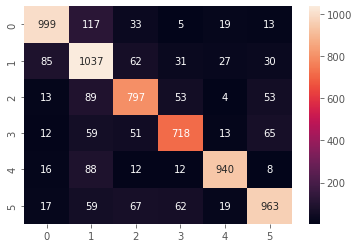

In [154]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d');

## Saving Genre Classifier Model

In [225]:
# Saving the model
file_name = 'genre_classifier.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(eclf_genre,file)

In [236]:
with open('tfidf_genre.pkl', 'wb') as output:
    pickle.dump(tf, output)

In [48]:
# # eclf.classes_
validation = """
This is Hello Games.

Hello Games acknowledged that they messed up by overhyping the game and lying about features that weren't present at launch.

Hello Games buckled down and started fixing the game and adding features free of charge instead of taking the money and running.

Hello Games went from being maligned to admired by most everyone who has played their vastly-improved No Man's Sky as well as their other work, all thanks to admitting fault and fixing their mistake.

Be like Hello Games.
"""
validation = pd.Series(validation)

val = tf.transform(validation)
print(eclf_sentiment.predict(val))
print(eclf_genre.predict(val))
# review2 = """One of the best comeback stories in modern videogames. Strongly recommend for any would-be scifi adventurer into spaceships, alien worlds and space exploration, and base building or resource exploiting. I absolutely HATED this game at release after it absolutely botched the landing in apocalyptic fashion, turning all of the hype around it into one of the most stunningly underwhelming and disappointing slogs I'd ever played. That said, the commitment of the development team to rectify that massive blunder is one of the most admirable efforts I've ever seen out of a developer. They could have taken the money and ran, but they really dug in to make their game as great as they dreamed about in their head before launch and this game has come a LONG way in a BIG way because of that, and is an entirely different and far more worthwhile experience. Just watch a video of what this game was like at launch and compare that against the history of even just the first 4 updates yourself for the proof in the pudding. BARRING the catastrophic launch, this game could serve as a great template for continuing to support a released videogame. If they stopped the updates right now, hell even 3 updates ago, the game would stand as a valiant success against the odds of a pointedly deserved animosity. The history of this game starting as one of the hardest failures in the industry wont be forgotten but that arguably serves it well, and makes for a great story for just how much hard work and dedication can improve even the worst of failures into a rousing success."""
# review2 = pd.Series(review2)
# validation = validation.append(review2)
# validation
# validation = validation.str.replace(pattern, replacer).str.lower().str.split()
# validation = validation.apply(remove_stopwords).apply(get_stems)
# val = tf.fit_transform(validation)
# eclf.predict(val)

[ True]
['action']


In [49]:
a = pd.Series('Looks like shit, runs like shit and feels like shit')
a = tf.transform(a)
eclf_sentiment.predict(a)

array([ True])

In [50]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7925691937424789

In [51]:
lr.predict(a)

array(['sports'], dtype=object)

## Using RandomSearch and Gridsearch for Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [63]:
# RandomSearch
params = {'Ridge Classifier__alpha':uniform(loc=1.0, scale=1000), 'Ridge Classifier__normalize':[True, False],
         'Perceptron__penalty':['l2','l1','elasticnet'],
         'Passive Aggressive Classifier__C':uniform(loc=1.0, scale=1000),
#          'Complement Naive Bayes__alpha':uniform(loc=1.0, scale=1000), 'Complement Naive Bayes_norm':[True, False],
#           'Logistic Regression_penalty':['l2','l1','elasticnet', None], 'Logistic Regression__C':uniform(loc=1.0, scale=10000),
         }
eclf_genre_RS = RandomizedSearchCV(eclf_genre, params, random_state=101, n_iter=100)
search_genre = eclf_genre_RS.fit(X_train, y_train)
print(search_genre.best_estimator_)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

VotingClassifier(estimators=[('Ridge Classifier',
                              RidgeClassifier(alpha=2.1886611994497143,
                                              normalize=True,
                                              solver='sparse_cg', tol=0.01)),
                             ('Perceptron', Perceptron(penalty='l1')),
                             ('Passive Aggressive Classifier',
                              PassiveAggressiveClassifier(C=678.055010376656)),
                             ('Complement Naive Bayes', ComplementNB()),
                             ('Logistic Regression',
                              LogisticRegression(multi_class='multinomial',
                                                 solver='saga'))])


In [64]:
eclf_genre_best = search_genre.best_estimator_
eclf_genre_best.score(X_test, y_test)

0.8164861612515042

## Topic Modelling with Gensim

In [170]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [171]:
id2word = corpora.Dictionary(fd)

corpus = []
for text in fd:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]
1


In [172]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=5,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [193]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=25,
                                           random_state=100,
                                           update_every=5,
                                           chunksize=100,
                                           passes=20,
                                           alpha="auto")

In [173]:
lda_model.show_topic(5)

[('world', 0.00740813),
 ('stori', 0.007114074),
 ('interest', 0.0066644936),
 ('combat', 0.0062972703),
 ('charact', 0.006271747),
 ('feel', 0.006109626),
 ('mechan', 0.0058412957),
 ('end', 0.005727996),
 ('build', 0.0056521534),
 ('cool', 0.0053102127)]

In [174]:
# Visualizing the Topic Models
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.149307 -0.343485       1        1  42.418947
0     -0.035789 -0.393190       2        1  26.262320
5     -0.226278 -0.342000       3        1  21.554594
4     -0.230106  0.415553       4        1   3.682688
3      0.399451 -0.114587       5        1   2.417011
2      0.331365  0.124599       6        1   1.913004
9      0.145016  0.347960       7        1   0.760712
8     -0.316887  0.034672       8        1   0.480311
6     -0.190559  0.143403       9        1   0.358359
1     -0.025520  0.127074      10        1   0.152054, topic_info=            Term          Freq         Total Category  logprob  loglift
57          game  20801.000000  20801.000000  Default  30.0000  30.0000
144         play   9636.000000   9636.000000  Default  29.0000  29.0000
60          good   6747.000000   6747.000000  Default  28.0000  28.0000
100    recommend   3921.000000   3921.000000  Default  27.0000  27.0000
78          love   3738.000000   3738.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
8551      kawaii      4.276535      5.113062  Topic10  -6.0265   6.3100
16186      tamer      4.224351      5.060417  Topic10  -6.0388   6.3081
8548   disservic      2.830607      3.666630  Topic10  -6.4392   6.2299
2725    wholesom      8.699596     14.580998  Topic10  -5.3164   5.9722
16151    coromon      6.812625     32.769154  Topic10  -5.5609   4.9180

[515 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1         1  0.952334    10
1         2  0.003219    10
1         6  0.044345    10
2956      4  0.995928  1000
1253      2  0.582398    11
...     ...       ...   ...
130       6  0.994615     ‘
1351      6  0.076289     ’
1351      7  0.921568     ’
1352      7  0.991639     “
1353      7  0.984742     ”

[867 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 6, 5, 4, 3, 10, 9, 7, 2])

In [195]:
lda_model.print_topics()

[(0,
  '0.007*"use" + 0.005*"go" + 0.005*"point" + 0.004*"need" + 0.004*"basic" + 0.004*"back" + 0.004*"move" + 0.004*"take" + 0.004*"reason" + 0.004*"two"'),
 (1,
  '0.036*"ring" + 0.030*"sold" + 0.026*"holi" + 0.019*"pokemon" + 0.018*"elden" + 0.018*"rn" + 0.017*"gloriou" + 0.014*"honor" + 0.011*"fox" + 0.011*"simultan"'),
 (2,
  '0.025*"15" + 0.024*"expans" + 0.011*"cup" + 0.010*"audienc" + 0.010*"workshop" + 0.010*"w" + 0.009*"paint" + 0.009*"infin" + 0.009*"potato" + 0.009*"soul"'),
 (3,
  '0.014*"rpg" + 0.013*"armi" + 0.012*"chill" + 0.010*"nation" + 0.010*"battl" + 0.010*"ball" + 0.009*"plane" + 0.009*"skirmish" + 0.009*"intuit" + 0.008*"cold"'),
 (4,
  '0.019*"can" + 0.018*"not" + 0.015*"ea" + 0.013*"state" + 0.013*"broken" + 0.012*"buggi" + 0.011*"fuck" + 0.010*"worst" + 0.009*"terribl" + 0.009*"server"'),
 (5,
  '0.007*"world" + 0.007*"stori" + 0.007*"interest" + 0.006*"combat" + 0.006*"charact" + 0.006*"feel" + 0.006*"mechan" + 0.006*"end" + 0.006*"build" + 0.005*"cool"'),
 

In [194]:
vis = pyLDAvis.gensim_models.prepare(lda_model2, corpus, id2word, mds="mmds", R=25)
vis

C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.420470 -0.313089       1        1  48.505229
22    -0.111985  0.515828       2        1  11.170353
3     -0.502573  0.050162       3        1  10.700845
7     -0.495161 -0.152324       4        1   9.995363
19    -0.450056  0.290528       5        1   9.036553
21    -0.239951  0.375147       6        1   1.517139
20    -0.024988 -0.478811       7        1   1.097022
15     0.314437 -0.386843       8        1   0.987106
10     0.447322 -0.150161       9        1   0.862563
12     0.179098  0.421481      10        1   0.764457
5      0.444791  0.081935      11        1   0.729215
23     0.357921  0.272776      12        1   0.658834
14    -0.228462  0.151977      13        1   0.629464
11    -0.185209 -0.311399      14        1   0.554172
16     0.141129 -0.319475      15        1   0.393279
24     0.014561 -0.260934      16        1   0.308195
4     -0.097703 -0.149916      17        1   0.306547
0     -0.142248 -0.000651      18        1   0.292892
17     0.135342  0.257561      19        1   0.287354
2      0.212884 -0.165319      20        1   0.278417
18     0.270108 -0.034286      21        1   0.256811
6      0.012057  0.182278      22        1   0.229723
8      0.228235  0.111369      23        1   0.217930
1      0.041428  0.044444      24        1   0.162603
9      0.099491 -0.032275      25        1   0.057935, topic_info=       Term          Freq         Total Category  logprob  loglift
57     game  25661.000000  25661.000000  Default  25.0000   25.000
144    play  11917.000000  11917.000000  Default  24.0000   24.000
60     good   8321.000000   8321.000000  Default  23.0000   23.000
174     fun   7554.000000   7554.000000  Default  22.0000   22.000
249   great   5816.000000   5816.000000  Default  21.0000   21.000
...     ...           ...           ...      ...      ...      ...
7332     rt      0.017955      1.043681  Topic25 -10.5346    3.391
4172  steel      0.017955      1.043681  Topic25 -10.5346    3.391
3102     20      0.017955      1.043682  Topic25 -10.5346    3.391
3086    mod      0.017955      1.043682  Topic25 -10.5346    3.391
3244     ui      0.017955      1.043682  Topic25 -10.5346    3.391

[842 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1222      3  0.072593    &
1222      5  0.925963    &
1092      2  0.998515    0
0         1  0.290370    1
0         2  0.653807    1
...     ...       ...  ...
130      10  0.169158    ‘
1351      6  0.022450    ’
1351     10  0.975313    ’
1352     10  0.994535    “
1353     10  0.989228    ”

[892 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 23, 4, 8, 20, 22, 21, 16, 11, 13, 6, 24, 15, 12, 17, 25, 5, 1, 18, 3, 19, 7, 9, 2, 10])

In [197]:
lda_model2.top_topics(corpus)

[([(0.018335398, 'like'),
   (0.014705912, 'get'),
   (0.014360783, 'time'),
   (0.011251795, 'one'),
   (0.011159561, 'make'),
   (0.009684668, 'even'),
   (0.00959506, 'realli'),
   (0.009450252, 'feel'),
   (0.009443683, 'go'),
   (0.009270748, 'much'),
   (0.008823673, 'would'),
   (0.0083337, 'hour'),
   (0.008327535, 'want'),
   (0.008284028, 'lot'),
   (0.0080933655, 'thing'),
   (0.007955168, 'way'),
   (0.007700883, 'look'),
   (0.007564078, 'need'),
   (0.007293762, 'also'),
   (0.0071551627, 'see')],
  -1.1897604930678212),
 ([(0.015055558, 'combat'),
   (0.0143759195, 'battl'),
   (0.013188115, 'charact'),
   (0.012098297, 'enemi'),
   (0.011348516, 'design'),
   (0.011139194, 'main'),
   (0.009245404, 'side'),
   (0.009022133, 'choic'),
   (0.008930867, 'fight'),
   (0.008929173, 'uniqu'),
   (0.0089199785, 'abil'),
   (0.008139824, 'system'),
   (0.008112323, 'weapon'),
   (0.008073769, 'quest'),
   (0.007884642, 'certain'),
   (0.007576329, 'visual'),
   (0.0074563045, '

In [160]:
def lda_vis(fd):
    def make_lda(fd):
        id2word = corpora.Dictionary(fd)
        corpus = [id2word.doc2bow(text) for text in fd]
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=25,
                                               random_state=100,
                                               update_every=5,
                                               chunksize=100,
                                               passes=20,
                                               alpha="auto")
        return model, corpus, id2word
    
    model, corpus, id2word = make_lda(fd)
    vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word, mds="mmds", R=25)
    return vis

In [266]:
lda_vis(fd)

C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.420470 -0.313089       1        1  48.505229
22    -0.111985  0.515828       2        1  11.170353
3     -0.502573  0.050162       3        1  10.700845
7     -0.495161 -0.152324       4        1   9.995363
19    -0.450056  0.290528       5        1   9.036553
21    -0.239951  0.375147       6        1   1.517139
20    -0.024988 -0.478811       7        1   1.097022
15     0.314437 -0.386843       8        1   0.987106
10     0.447322 -0.150161       9        1   0.862563
12     0.179098  0.421481      10        1   0.764457
5      0.444791  0.081935      11        1   0.729215
23     0.357921  0.272776      12        1   0.658834
14    -0.228462  0.151977      13        1   0.629464
11    -0.185209 -0.311399      14        1   0.554172
16     0.141129 -0.319475      15        1   0.393279
24     0.014561 -0.260934      16        1   0.308195
4     -0.097703 -0.149916      17        1   0.306547
0     -0.142248 -0.000651      18        1   0.292892
17     0.135342  0.257561      19        1   0.287354
2      0.212884 -0.165319      20        1   0.278417
18     0.270108 -0.034286      21        1   0.256811
6      0.012057  0.182278      22        1   0.229723
8      0.228235  0.111369      23        1   0.217930
1      0.041428  0.044444      24        1   0.162603
9      0.099491 -0.032275      25        1   0.057935, topic_info=       Term          Freq         Total Category  logprob  loglift
57     game  25661.000000  25661.000000  Default  25.0000   25.000
144    play  11917.000000  11917.000000  Default  24.0000   24.000
60     good   8321.000000   8321.000000  Default  23.0000   23.000
174     fun   7554.000000   7554.000000  Default  22.0000   22.000
249   great   5816.000000   5816.000000  Default  21.0000   21.000
...     ...           ...           ...      ...      ...      ...
7332     rt      0.017955      1.043681  Topic25 -10.5346    3.391
4172  steel      0.017955      1.043681  Topic25 -10.5346    3.391
3102     20      0.017955      1.043682  Topic25 -10.5346    3.391
3086    mod      0.017955      1.043682  Topic25 -10.5346    3.391
3244     ui      0.017955      1.043682  Topic25 -10.5346    3.391

[842 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1222      3  0.072593    &
1222      5  0.925963    &
1092      2  0.998515    0
0         1  0.290370    1
0         2  0.653807    1
...     ...       ...  ...
130      10  0.169158    ‘
1351      6  0.022450    ’
1351     10  0.975313    ’
1352     10  0.994535    “
1353     10  0.989228    ”

[892 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 23, 4, 8, 20, 22, 21, 16, 11, 13, 6, 24, 15, 12, 17, 25, 5, 1, 18, 3, 19, 7, 9, 2, 10])

In [285]:
# Making Topic models for each genre
genre = df.genre.unique().tolist()
lda_by_genre = dict()
for g in genre:
    subset = df[df['genre'] == g]
    subset_fd = FrequencyDistribution(subset.review_stemmed)
    vis = lda_vis(subset_fd)
    lda_by_genre[g] = vis

C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default

In [290]:
# Saving the topic models as HTML
# https://stackoverflow.com/questions/41936775/export-pyldavis-graphs-as-standalone-webpage
for k,v in lda_by_genre.items():
    pyLDAvis.save_html(v, f'{k}_lda.html')

In [288]:
lda_by_genre['simulation']

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.178718  0.318674       1        1  52.876451
9      0.418952 -0.280974       2        1   7.425169
11    -0.181205  0.316424       3        1   5.490581
20    -0.068167  0.376835       4        1   4.655893
6      0.298594 -0.000030       5        1   3.140493
4      0.429367  0.082145       6        1   2.863348
2      0.071060  0.344031       7        1   2.844863
8     -0.325595 -0.239676       8        1   2.684957
7     -0.350791  0.215185       9        1   2.595288
24     0.150390  0.144459      10        1   2.264626
10     0.285963  0.186567      11        1   1.846477
23     0.003945  0.191181      12        1   1.642897
14    -0.364156 -0.053885      13        1   1.224858
16    -0.113485  0.121223      14        1   1.017347
1     -0.088983 -0.425992      15        1   1.006641
12    -0.307085  0.078016      16        1   0.934279
15     0.061949 -0.111539      17        1   0.855040
18    -0.141465  0.009088      18        1   0.812128
0      0.038985  0.036767      19        1   0.774847
21     0.210866 -0.147238      20        1   0.717621
19    -0.198663 -0.119370      21        1   0.710268
13     0.035511 -0.318093      22        1   0.545958
22     0.133052 -0.288145      23        1   0.431854
3     -0.044102 -0.191524      24        1   0.386849
5     -0.133654 -0.244129      25        1   0.251267, topic_info=         Term         Freq        Total Category  logprob  loglift
187      game  3567.000000  3567.000000  Default  25.0000  25.0000
34       play  1693.000000  1693.000000  Default  24.0000  24.0000
462       fun  1212.000000  1212.000000  Default  23.0000  23.0000
253      love   810.000000   810.000000  Default  22.0000  22.0000
1073     word   379.000000   379.000000  Default  21.0000  21.0000
...       ...          ...          ...      ...      ...      ...
12    complet     1.297844   323.219989  Topic25  -5.5358   0.4688
1536     mind     0.512345   125.969717  Topic25  -6.4652   0.4816
308    pretti     1.016152   367.684113  Topic25  -5.7805   0.0952
150      even     1.309139   640.520139  Topic25  -5.5271  -0.2065
27       make     1.023337   785.341977  Topic25  -5.7734  -0.6566

[1166 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1010      9  0.881242     #
432       1  0.388054     1
432       2  0.173239     1
432       3  0.103943     1
432       5  0.242534     1
...     ...       ...   ...
431      21  0.032308   yet
1519     11  0.937323   zen
1631     13  0.825123  zerg
643       1  0.509995     ’
643       5  0.472218     ’

[2864 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 10, 12, 21, 7, 5, 3, 9, 8, 25, 11, 24, 15, 17, 2, 13, 16, 19, 1, 22, 20, 14, 23, 4, 6])

In [161]:
# Making Topic models for each genre & rating
# genre = df.genre.unique().tolist()
voted_up = [True, False]
lda_by_vote = dict()
for v in voted_up:
    subset = df[df['voted_up'] == v]
    subset_fd = FrequencyDistribution(subset.review_stemmed)
    vis = lda_vis(subset_fd)
    lda_by_vote[v] = vis

C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [163]:
lda_by_vote[True]

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.187436  0.511818       1        1  44.394761
16    -0.488663  0.198013       2        1  37.098949
11    -0.358684  0.356177       3        1   5.901905
21     0.340081  0.371000       4        1   1.985452
12    -0.243736 -0.418907       5        1   1.141217
7      0.482882  0.067892       6        1   1.081455
22     0.056733  0.408814       7        1   1.062607
23     0.222999  0.313528       8        1   0.990539
1     -0.410787 -0.109142       9        1   0.709534
13     0.287705 -0.299217      10        1   0.562428
4     -0.001196 -0.422381      11        1   0.547415
9     -0.291028 -0.215934      12        1   0.488357
18     0.353229 -0.141430      13        1   0.425398
14    -0.059549  0.228315      14        1   0.405959
8      0.142572 -0.338607      15        1   0.397672
17    -0.264921  0.027444      16        1   0.3964

In [169]:
lda_by_vote.items()

dict_items([(True, PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.187436  0.511818       1        1  44.394761
16    -0.488663  0.198013       2        1  37.098949
11    -0.358684  0.356177       3        1   5.901905
21     0.340081  0.371000       4        1   1.985452
12    -0.243736 -0.418907       5        1   1.141217
7      0.482882  0.067892       6        1   1.081455
22     0.056733  0.408814       7        1   1.062607
23     0.222999  0.313528       8        1   0.990539
1     -0.410787 -0.109142       9        1   0.709534
13     0.287705 -0.299217      10        1   0.562428
4     -0.001196 -0.422381      11        1   0.547415
9     -0.291028 -0.215934      12        1   0.488357
18     0.353229 -0.141430      13        1   0.425398
14    -0.059549  0.228315      14        1   0.405959
8      0.142572 -0.338607      15        1   0.397672
17    -0.264921  0.027444      1

In [167]:
voted_up_fd = FrequencyDistribution(df[df['voted_up']==True]['review'])

In [168]:
lda_vis(voted_up_fd)

C:\Users\Patrick\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.413654  0.344658       1        1  52.749701
15     0.566248  0.124739       2        1  37.669031
8     -0.267176  0.446590       3        1   3.262325
16     0.163232  0.462254       4        1   2.389622
13     0.175300 -0.323502       5        1   0.492367
22     0.293944 -0.137514       6        1   0.478505
12    -0.117801  0.242859       7        1   0.383492
2     -0.167698 -0.310481       8        1   0.299558
6     -0.334947  0.014321       9        1   0.295243
11     0.107348  0.157520      10        1   0.266995
10     0.168312 -0.028396      11        1   0.224624
1     -0.027705  0.082711      12        1   0.174891
21    -0.229656 -0.100208      13        1   0.164544
17    -0.150426  0.084398      14        1   0.143109
9     -0.021572 -0.238839      15        1   0.136411
23    -0.200524  0.009081      16        1   0.1273

## Converting Author column to an actual dataframe/dictionary

In [ ]:
# Convert author column to a dictionary
# https://stackoverflow.com/questions/39169718/convert-string-to-dict-then-access-keyvalues-how-to-access-data-in-a-class
import ast

# df = df["Coordinates"].astype('str')
# df = df.apply(lambda x: ast.literal_eval(x))
# df = df.apply(pd.Series)

In [ ]:
df2 = df['author'].astype('str')
df2 = df2.apply(lambda x: ast.literal_eval(x))
df2 = df2.apply(pd.Series)

In [ ]:
repeated_ids = df2[df2.steamid.duplicated(keep=False)]

In [ ]:
repeated_ids

In [ ]:
df2[df2['steamid'] == '76561198098399242']

In [ ]:
# I think I double-counted/ collected duplicate reviews. Have to figure this out.
# Downloading more recent reviews should help
df.recommendationid.nunique()

In [ ]:
import flask
import pickle

# with open('NLP_classification_model', 'wb') as f:
#     f.

s = pickle.dumps(clf)


In [ ]:
clf2 = pickle.loads(s)
clf2.score(X_test, y_test)

In [ ]:
# Saving a classifier
with open('my_dumped_classifier.pkl', 'wb') as fid:
    pickle.dump(clf, fid)    